In [1]:
from alphas import *

ls = Alphas.get_benchmark(2022, 'sh000300')
ls.set_index(['date'])
ls

d:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Unnamed: 0        date      open      high       low     close  \
4610        4610  2021-01-04  5212.931  5284.434  5190.937  5267.718   
4611        4611  2021-01-05  5245.836  5368.505  5234.378  5368.505   
4612        4612  2021-01-06  5386.514  5433.469  5341.430  5417.668   
4613        4613  2021-01-07  5428.394  5513.657  5413.353  5513.657   
4614        4614  2021-01-08  5526.288  5547.473  5442.694  5495.431   
...          ...         ...       ...       ...       ...       ...   
5090        5090  2022-12-26  3830.568  3856.807  3827.519  3843.489   
5091        5091  2022-12-27  3860.905  3891.850  3856.580  3887.854   
5092        5092  2022-12-28  3874.913  3884.721  3854.941  3871.264   
5093        5093  2022-12-29  3854.236  3868.293  3838.480  3856.701   
5094        5094  2022-12-30  3873.936  3887.553  3868.757  3871.634   

           volume  
4610  21171138200  
4611  22493115900  
4612  19377344400  
4613  21987208000  
4614  20432495600  
...           ...  
5090   7300571200  
5091   7751535000  
5092   8442465600  
5093   7939481500  
5094   7877327200  

[485 rows x 7 columns]

In [2]:
import pandas as pd
from datas import *

year = 2022
list_assets, df_assets = get_hs300_stocks(f'{year}-01-01')
dfs= get_all_date_data(f'{year}-01-01', f'{year+1}-01-01', list_assets)


df_all = dfs[['date', 'asset', "close"]]
df_all['date'] = pd.to_datetime(df_all['date'])
# print(df_all)

close = df_all.pivot(index='date', columns='asset', values='close')
# close.index = pd.to_datetime(close.index)
print(close)

login success!
login respond error_code:0
login respond  error_msg:success
query_hs300 error_code:0
query_hs300  error_msg:success
logout success!
300
asset       000001  000002  000063  000066  000069  000100  000157  000166  \
date                                                                         
2022-01-04   16.66   20.49   33.42   14.67    7.26    6.24    7.21    5.13   
2022-01-05   17.15   21.17   32.95   14.93    7.80    6.33    7.26    5.12   
2022-01-06   17.12   21.05   33.09   14.88    7.75    6.28    7.42    5.08   
2022-01-07   17.20   21.89   33.50   14.50    7.83    6.35    7.67    5.08   
2022-01-10   17.19   22.16   34.58   15.43    7.99    6.42    7.67    5.11   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2022-12-26   12.77   18.37   25.07   10.36    5.44    3.75    5.52    3.96   
2022-12-27   13.11   18.51   25.72   10.35    5.45    3.75    5.55    3.99   
2022-12-28   13.14   18.58   25.18   10.10    5.48    3.73    5.47   

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6860\446121936.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['date'] = pd.to_datetime(df_all['date'])


In [6]:
###########################简单现计算的因子#######################################
# alpha = dfs[['date', 'asset', "pctChg"]]
# alpha = alpha.rename(columns={
#         "pctChg": "factor"})
# alpha['date'] = pd.to_datetime(alpha['date'])
# alpha = alpha.set_index(['date', 'asset'], drop=True)
# alpha.sort_index(inplace=True)
# print(alpha)

############################已计算好存在文件中的因子######################################
alpha_num = 3
alpha_name = 'Alphas101'

# 读取已经计算好的因子
alpha = pd.read_csv('alphas/{}/{}/alpha{:03d}.csv'.format(alpha_name, year, alpha_num))

# 筛选出今年的数据，需与股票收盘日期区间一致
alpha = alpha[(alpha['date'] >= f'{year}-01-01') & (alpha['date'] <= f'{year+1}-01-01')]

# 因子矩阵转换为一维数据(alphalens需要的格式)
alpha = alpha.melt(id_vars=['date'], var_name='asset', value_name='factor' )

# date列转为日期格式
alpha['date'] = pd.to_datetime(alpha['date'])
alpha = alpha[['date', 'asset', 'factor']]

# 设置二级索引
alpha = alpha.set_index(['date', 'asset'], drop=True)
alpha.sort_index(inplace=True)
print(alpha)

#############################因子分析#######################################

from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_full_tear_sheet

ret = get_clean_factor_and_forward_returns(alpha, close,quantiles=10, periods=[1])
ret
#create_full_tear_sheet(ret, long_short=False)

                     factor
date       asset           
2022-01-04 000001  0.162397
           000002  0.468014
           000063  0.517693
           000066 -0.559620
           000069  0.073434
...                     ...
2022-12-30 688111 -0.043762
           688126 -0.237724
           688169 -0.128037
           688363 -0.246307
           688396 -0.653110

[72600 rows x 1 columns]


d:\project\alphas-main\alphalens\utils.py:290: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  if cumulative_returns:


max_loss is 35.0%, not exceeded: OK!


d:\project\alphas-main\alphalens\utils.py:654: InfoWarning: Dropped 0.4% entries from factor data: 0.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
  bin_loss = tot_loss - fwdret_loss


1D    factor  factor_quantile
date       asset                                      
2022-01-04 000001  0.029412  0.162397                8
           000002  0.033187  0.468014               10
           000063 -0.014063  0.517693               10
           000066  0.017723 -0.559620                1
           000069  0.074380  0.073434                7
...                     ...       ...              ...
2022-12-29 688111 -0.009401 -0.554800                2
           688126  0.007437 -0.507273                2
           688169 -0.022721  0.168911                8
           688363 -0.001550 -0.356685                3
           688396 -0.004161 -0.643804                1

[72300 rows x 3 columns]

In [36]:
import alphalens
mean_return_by_q_daily, std_err_daily = alphalens.performance.mean_return_by_quantile(ret, by_date=True)
mean_return_by_q_daily.head()

1D        5D       10D
factor_quantile date                                    
1               2023-01-03  0.004476  0.004401  0.000963
                2023-01-04 -0.001310 -0.001492 -0.005444
                2023-01-05 -0.002454 -0.002854 -0.009473
                2023-01-06  0.003554  0.005015  0.000318
                2023-01-09 -0.000035 -0.001523 -0.002376

In [37]:

mean_return_by_q, std_err_q = alphalens.performance.mean_return_by_quantile(ret, by_date=False)
mean_return_by_q.head()

1D        5D       10D
factor_quantile                              
1                0.000397  0.001323  0.000311
2                0.000080 -0.000096  0.000623
3               -0.000092 -0.000659 -0.000302
4               -0.000197 -0.000419 -0.000415
5               -0.000188 -0.000171 -0.000245

<Axes: title={'center': 'Mean Period Wise Return By Factor Quantile'}, ylabel='Mean Return (bps)'>

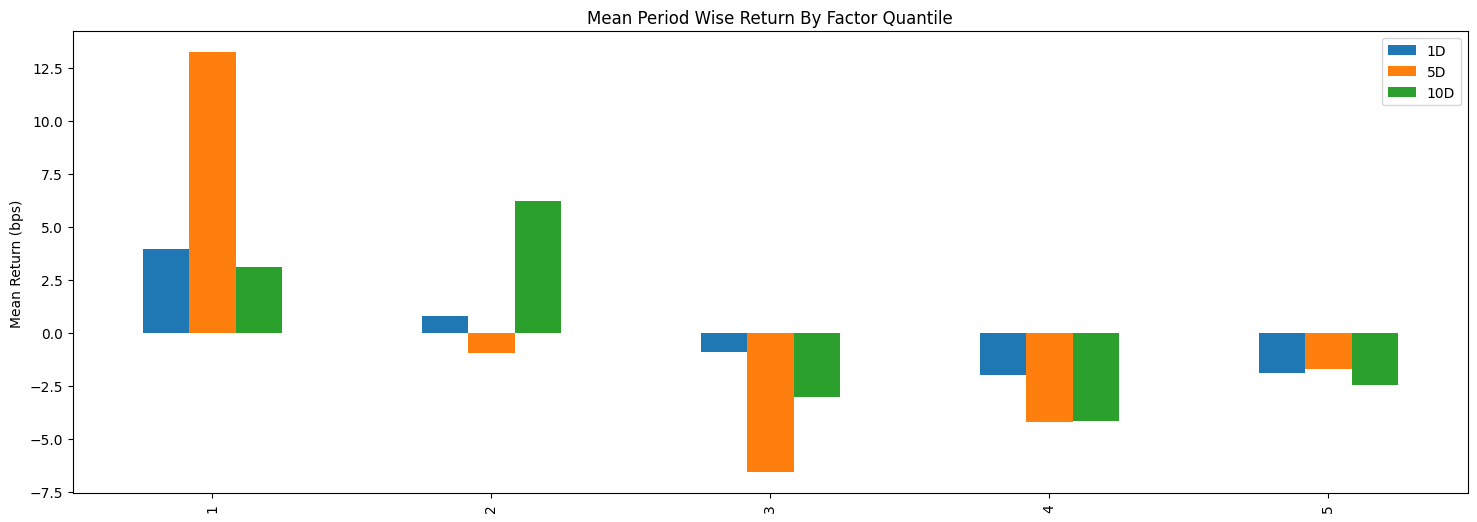

In [38]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q)

<Axes: title={'center': 'Period Wise Return By Factor Quantile'}, ylabel='Return (bps)'>

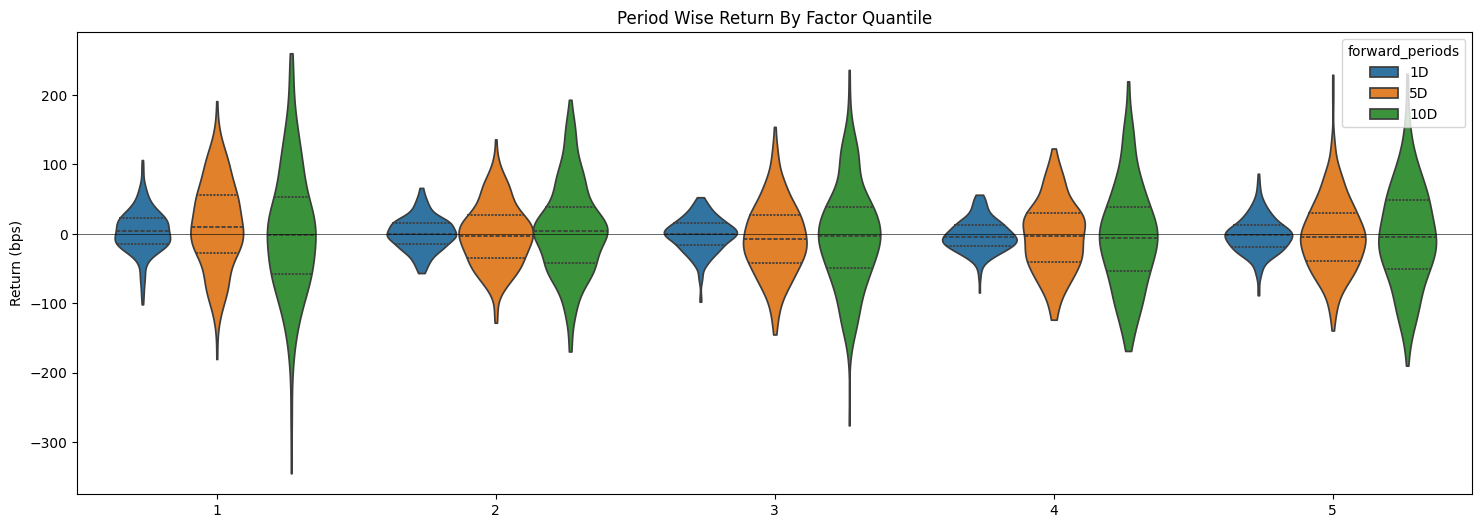

In [39]:
alphalens.plotting.plot_quantile_returns_violin(mean_return_by_q_daily)

In [40]:
quant_return_spread, std_err_spread = alphalens.performance.compute_mean_returns_spread(mean_return_by_q_daily,
                                                                                         upper_quant=5,
                                                                                         lower_quant=1,
                                                                                         std_err=std_err_daily)
quant_return_spread.head()

1D        5D       10D
date                                    
2023-01-03 -0.012536  0.003874  0.010035
2023-01-04  0.004522  0.011098  0.017442
2023-01-05  0.008098  0.011239  0.015328
2023-01-06 -0.004803 -0.002020  0.003088
2023-01-09  0.003606  0.002133  0.004235

[<Axes: title={'center': 'Top Minus Bottom Quantile Mean Return (1D Period Forward Return)'}, ylabel='Difference In Quantile Mean Return (bps)'>,
 <Axes: title={'center': 'Top Minus Bottom Quantile Mean Return (5D Period Forward Return)'}, ylabel='Difference In Quantile Mean Return (bps)'>,
 <Axes: title={'center': 'Top Minus Bottom Quantile Mean Return (10D Period Forward Return)'}, ylabel='Difference In Quantile Mean Return (bps)'>]

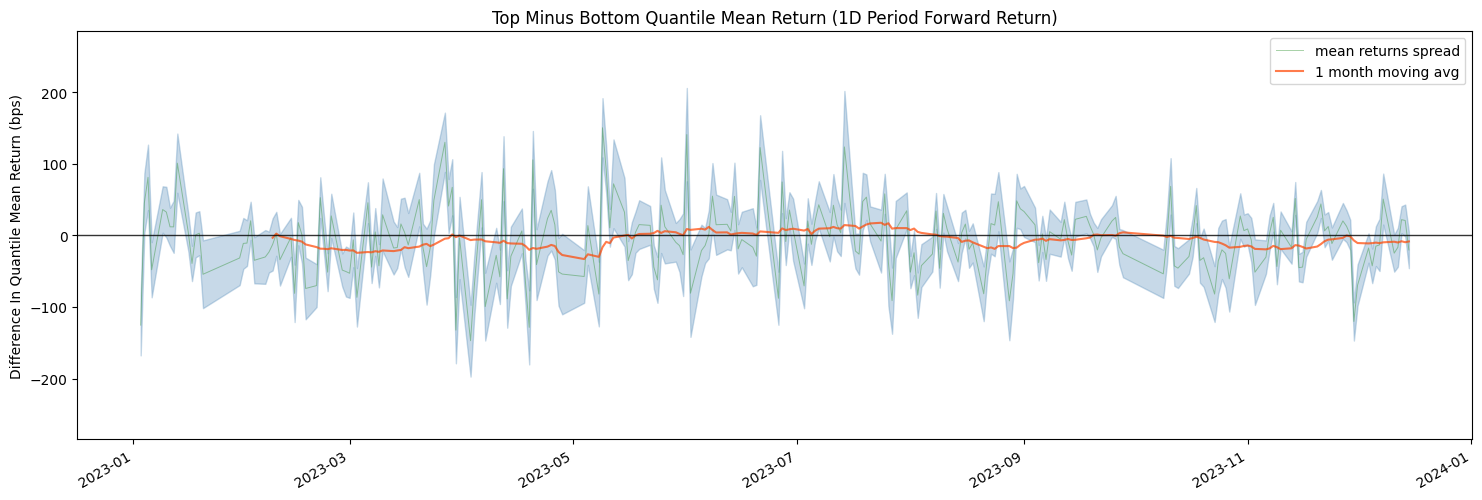

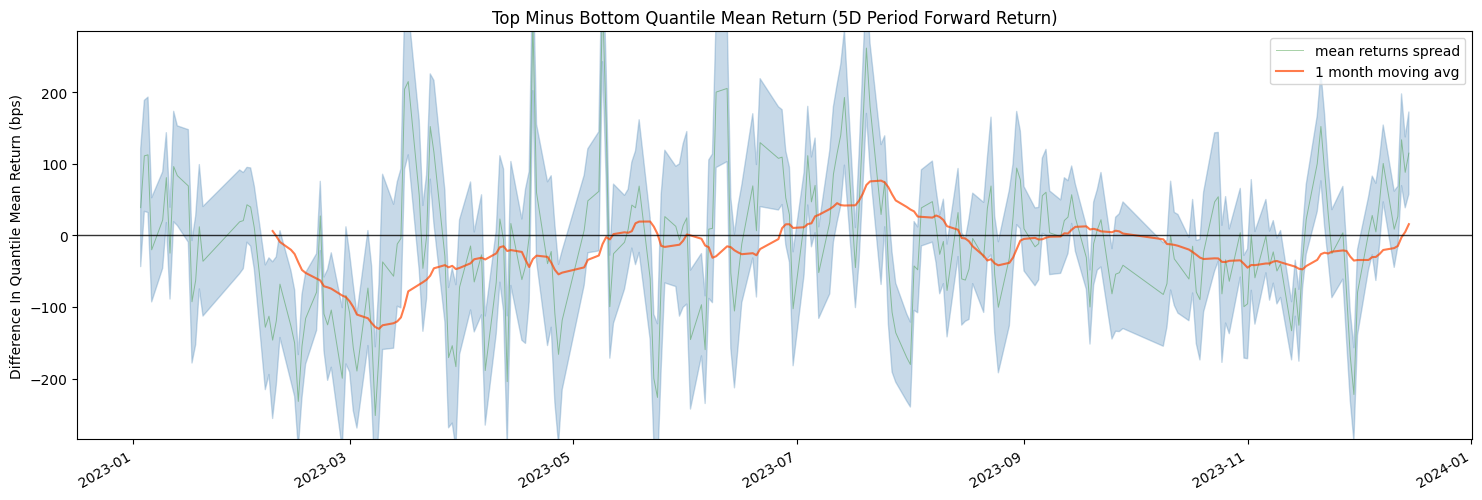

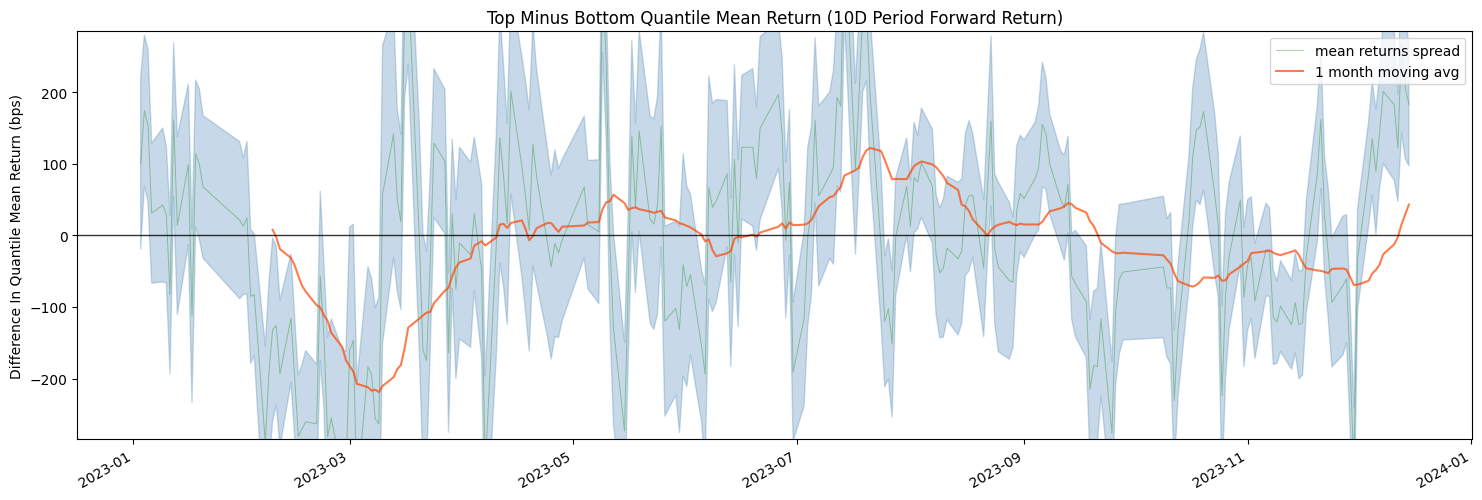

In [41]:
alphalens.plotting.plot_mean_quantile_returns_spread_time_series(quant_return_spread, std_err_spread)

<Axes: title={'center': 'Cumulative Return by Quantile\n                    (5D Period Forward Return)'}, ylabel='Log Cumulative Returns'>

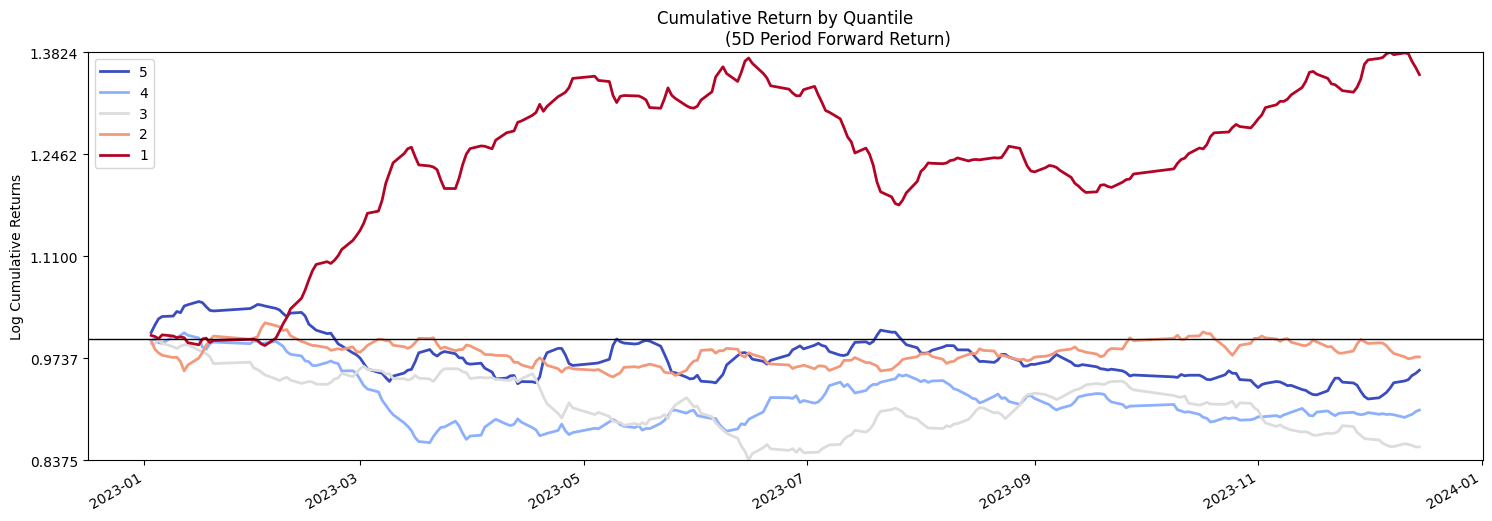

In [48]:
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q_daily['5D'], period = '5D') # period参数怎么没效果
#alphalens.plotting.plot_cumulative_returns(mean_return_by_q_daily, period = '1D')

In [44]:
ls_factor_returns = alphalens.performance.factor_returns(ret)
ls_factor_returns.head()

1D        5D       10D
date                                    
2023-01-03 -0.004927  0.002212  0.003734
2023-01-04  0.002244  0.006796  0.006121
2023-01-05  0.003422  0.003717  0.004333
2023-01-06 -0.003034 -0.001100  0.001061
2023-01-09  0.002305  0.003362  0.006291

<Axes: title={'center': 'Portfolio Cumulative Return (10D Fwd Period)'}, ylabel='Cumulative Returns'>

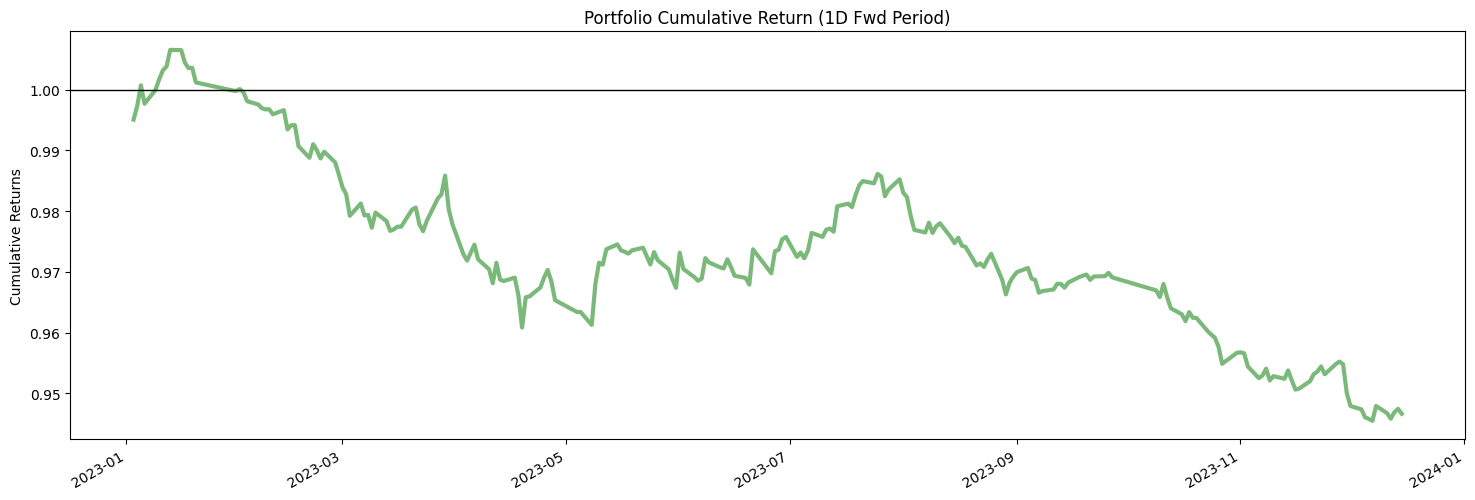

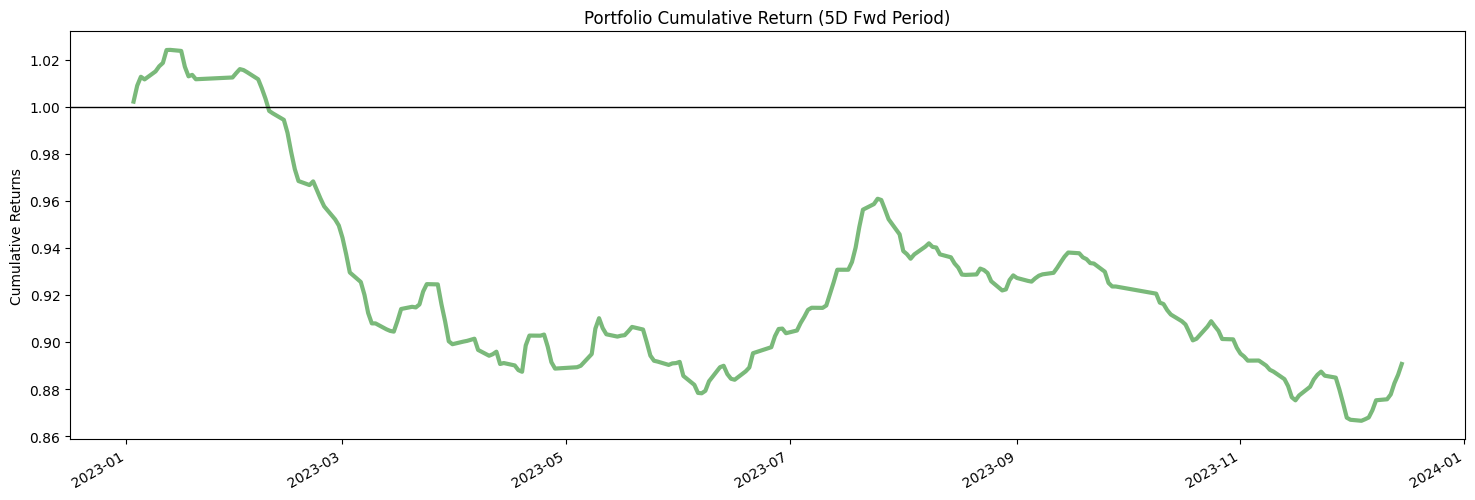

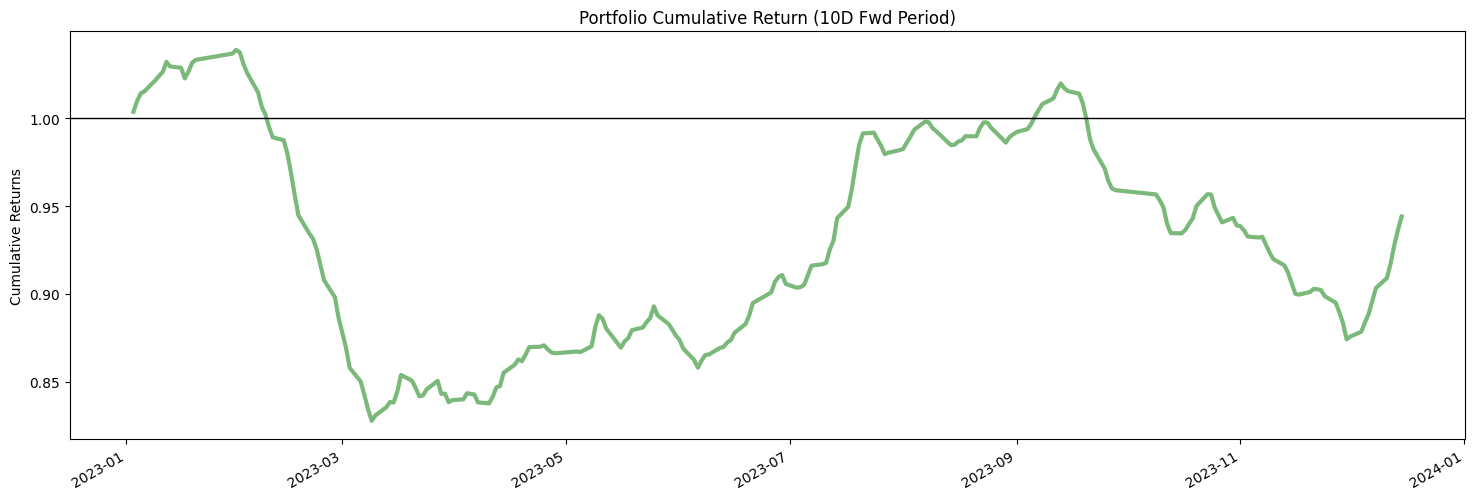

In [45]:
alphalens.plotting.plot_cumulative_returns(ls_factor_returns['1D'], period='1D')
alphalens.plotting.plot_cumulative_returns(ls_factor_returns['5D'], period='5D')
alphalens.plotting.plot_cumulative_returns(ls_factor_returns['10D'], period='10D')

In [49]:
alpha_beta = alphalens.performance.factor_alpha_beta(ret)
alpha_beta

1D        5D       10D
Ann. alpha -0.060279 -0.023105 -0.003268
beta       -0.022447  0.009156  0.016222

In [50]:
ic = alphalens.performance.factor_information_coefficient(ret)
ic.head()

1D        5D       10D
date                                    
2023-01-03 -0.179418  0.045685  0.043514
2023-01-04  0.115663  0.135674  0.100114
2023-01-05  0.112895  0.102512  0.091000
2023-01-06 -0.152001 -0.012733  0.044938
2023-01-09  0.133970  0.053962  0.124834

array([<Axes: title={'center': '1D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>,
       <Axes: title={'center': '5D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>,
       <Axes: title={'center': '10D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>],
      dtype=object)

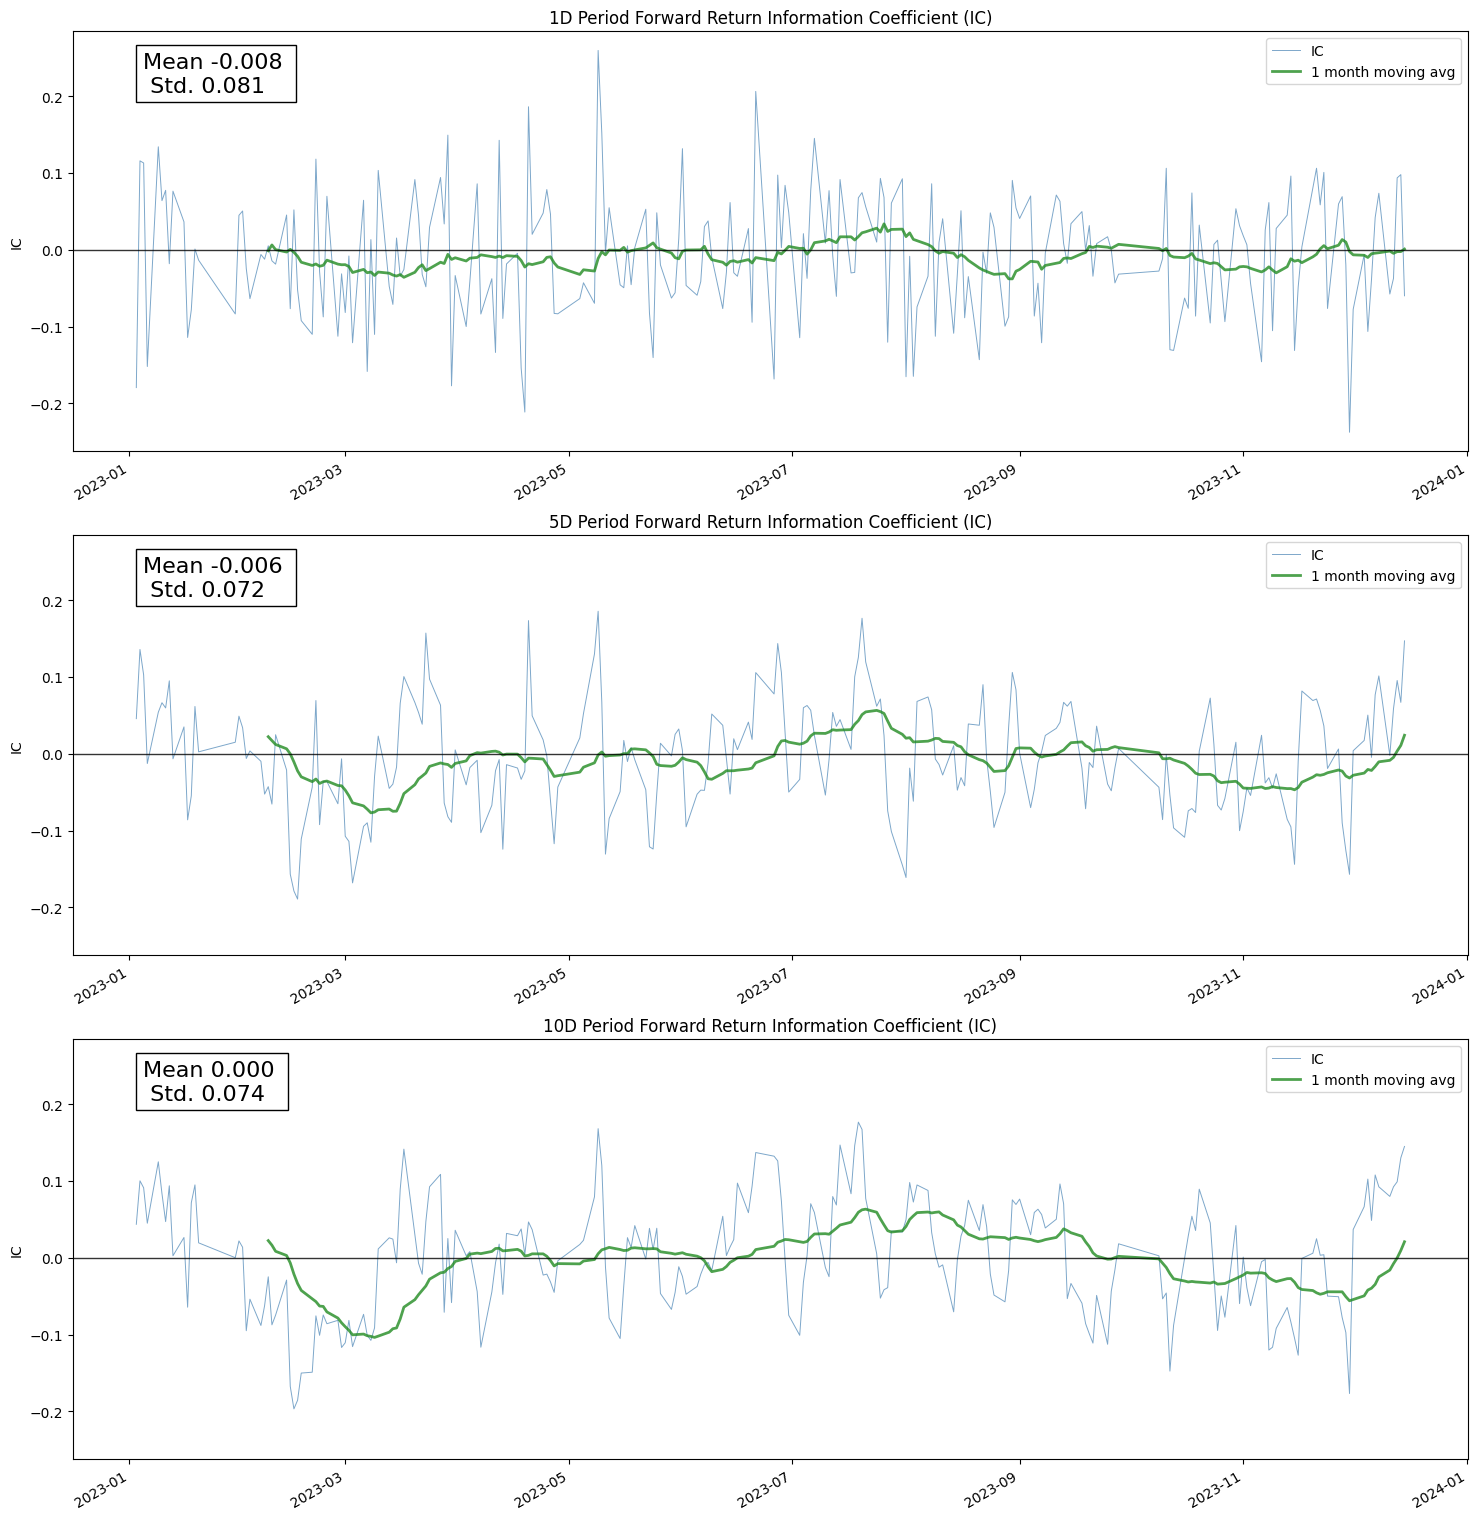

In [51]:
alphalens.plotting.plot_ic_ts(ic)

array([<Axes: title={'center': '1D Period IC'}, xlabel='IC', ylabel='Density'>,
       <Axes: title={'center': '5D Period IC'}, xlabel='IC', ylabel='Density'>,
       <Axes: title={'center': '10D Period IC'}, xlabel='IC', ylabel='Density'>],
      dtype=object)

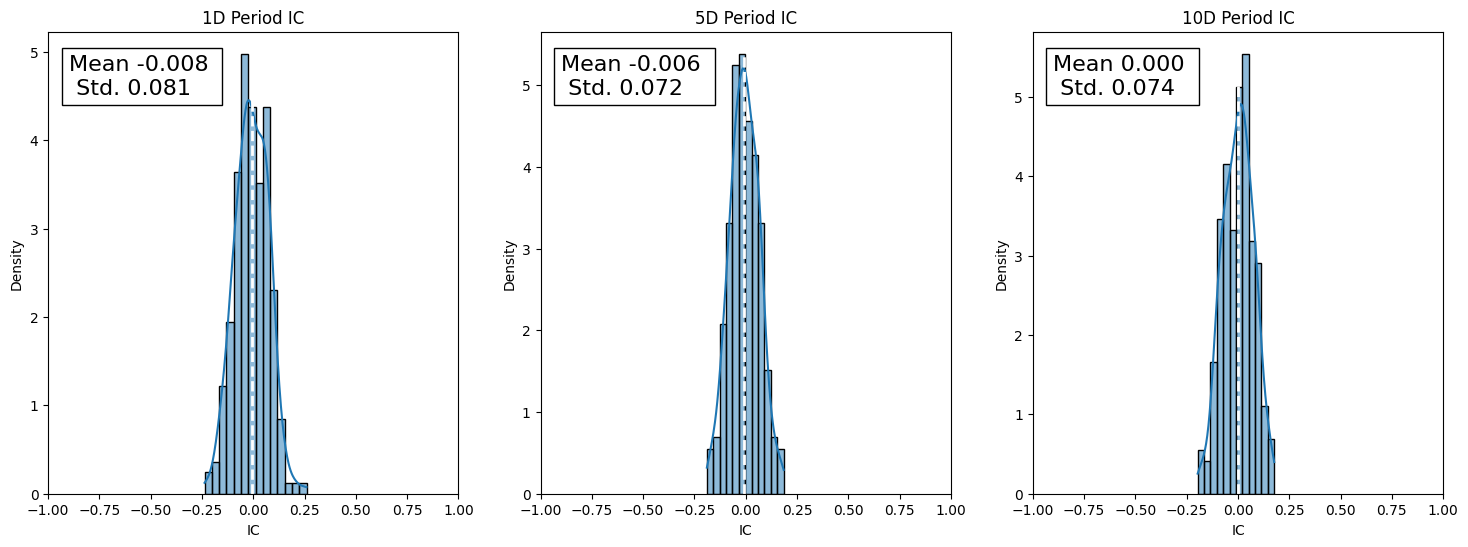

In [52]:
alphalens.plotting.plot_ic_hist(ic)

array([<Axes: title={'center': '1D Period IC Normal Dist. Q-Q'}, xlabel='Normal Distribution Quantile', ylabel='Observed Quantile'>,
       <Axes: title={'center': '5D Period IC Normal Dist. Q-Q'}, xlabel='Normal Distribution Quantile', ylabel='Observed Quantile'>,
       <Axes: title={'center': '10D Period IC Normal Dist. Q-Q'}, xlabel='Normal Distribution Quantile', ylabel='Observed Quantile'>],
      dtype=object)

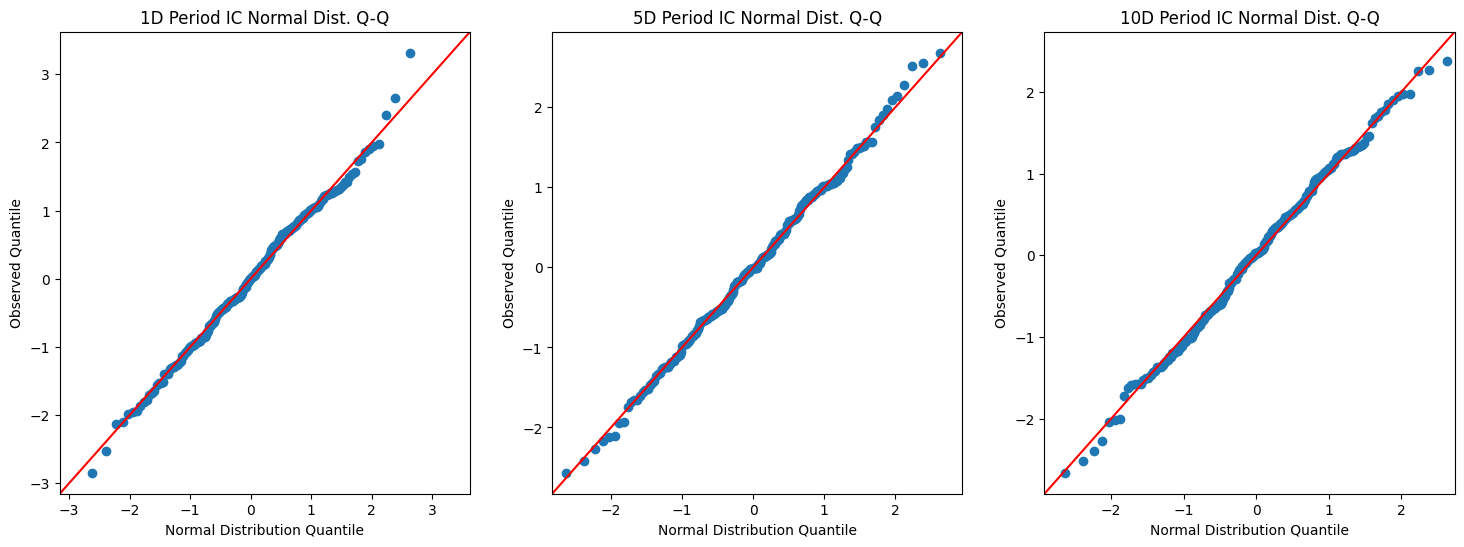

In [53]:
alphalens.plotting.plot_ic_qq(ic)

In [54]:
mean_monthly_ic = alphalens.performance.mean_information_coefficient(ret, by_time='M')
mean_monthly_ic.head()

d:\project\alphas-main\alphalens\performance.py:116: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


1D        5D       10D
date                                    
2023-01-31  0.001416  0.035075  0.050033
2023-02-28 -0.019542 -0.049104 -0.094291
2023-03-31 -0.013559 -0.016784 -0.009377
2023-04-30 -0.022835 -0.024394 -0.008980
2023-05-31 -0.004658 -0.003861  0.008565

array([<Axes: title={'center': 'Monthly Mean 1D Period IC'}>,
       <Axes: title={'center': 'Monthly Mean 5D Period IC'}>,
       <Axes: title={'center': 'Monthly Mean 10D Period IC'}>],
      dtype=object)

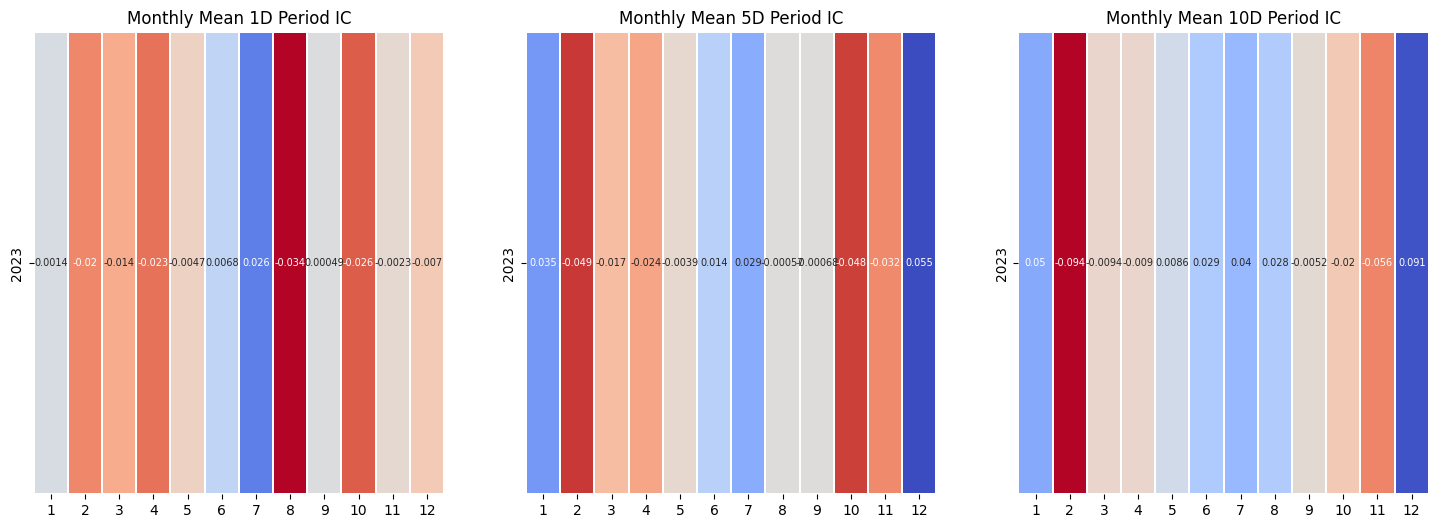

In [55]:
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic)

Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -0.997921 -0.271282 -0.583746  0.135394  13920  20.000000
2               -0.587488 -0.020845 -0.278533  0.096466  13920  20.000000
3               -0.398830  0.188630 -0.050418  0.079256  14101  20.260057
4               -0.149502  0.427923  0.165361  0.090079  13739  19.739943
5                0.111383  0.979594  0.495718  0.150549  13920  20.000000

Returns Analysis


1D     5D    10D
Ann. alpha                                    -0.060 -0.023 -0.003
beta                                          -0.022  0.009  0.016
Mean Period Wise Return Top Quantile (bps)    -1.879 -0.342 -0.245
Mean Period Wise Return Bottom Quantile (bps)  3.973  2.644  0.311
Mean Period Wise Spread (bps)                 -5.852 -2.978 -0.541

<Figure size 640x480 with 0 Axes>

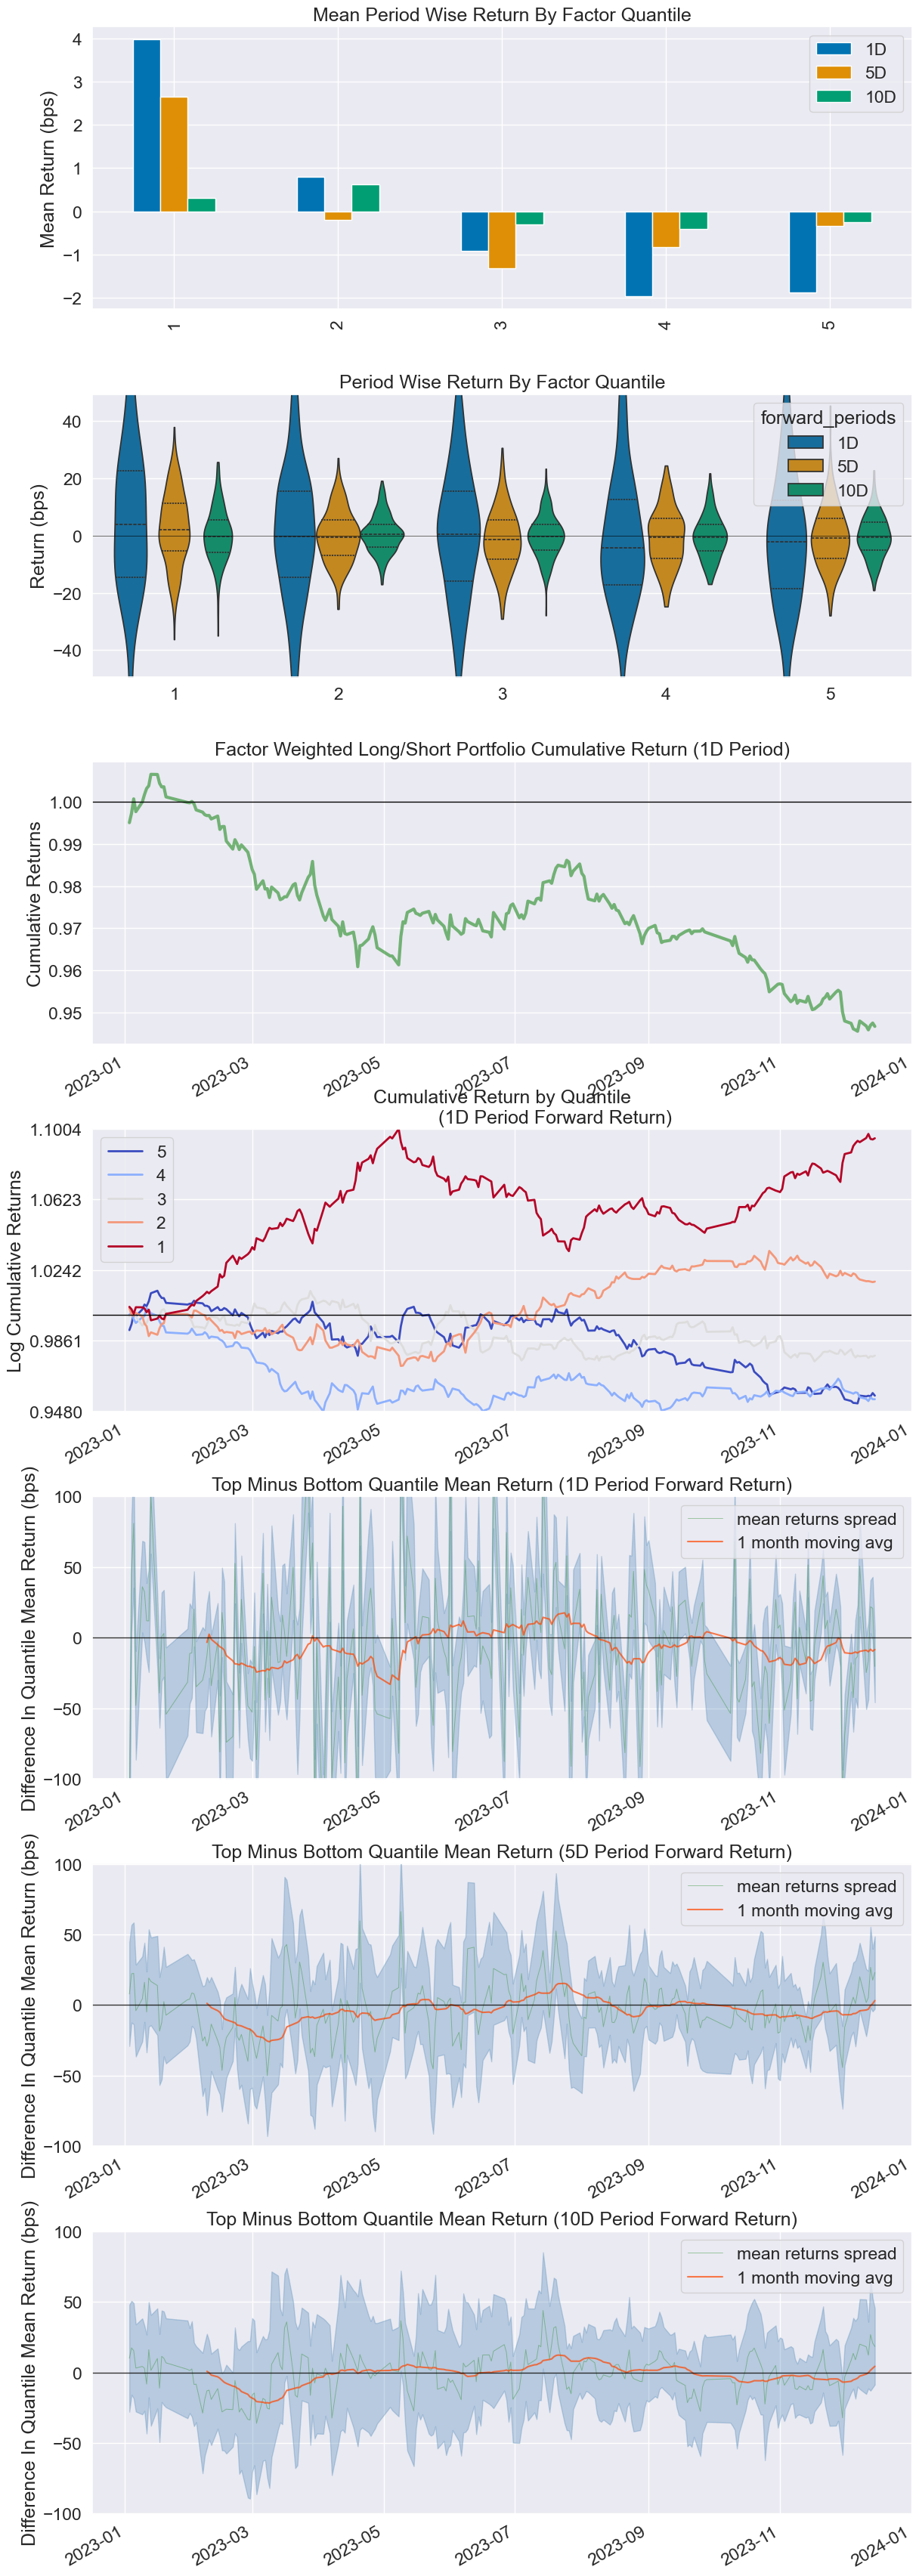

Information Analysis


1D     5D    10D
IC Mean          -0.008 -0.006  0.000
IC Std.           0.081  0.072  0.074
Risk-Adjusted IC -0.100 -0.084  0.004
t-stat(IC)       -1.516 -1.273  0.064
p-value(IC)       0.131  0.204  0.949
IC Skew           0.011  0.036 -0.081
IC Kurtosis      -0.005 -0.165 -0.409

d:\project\alphas-main\alphalens\performance.py:116: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


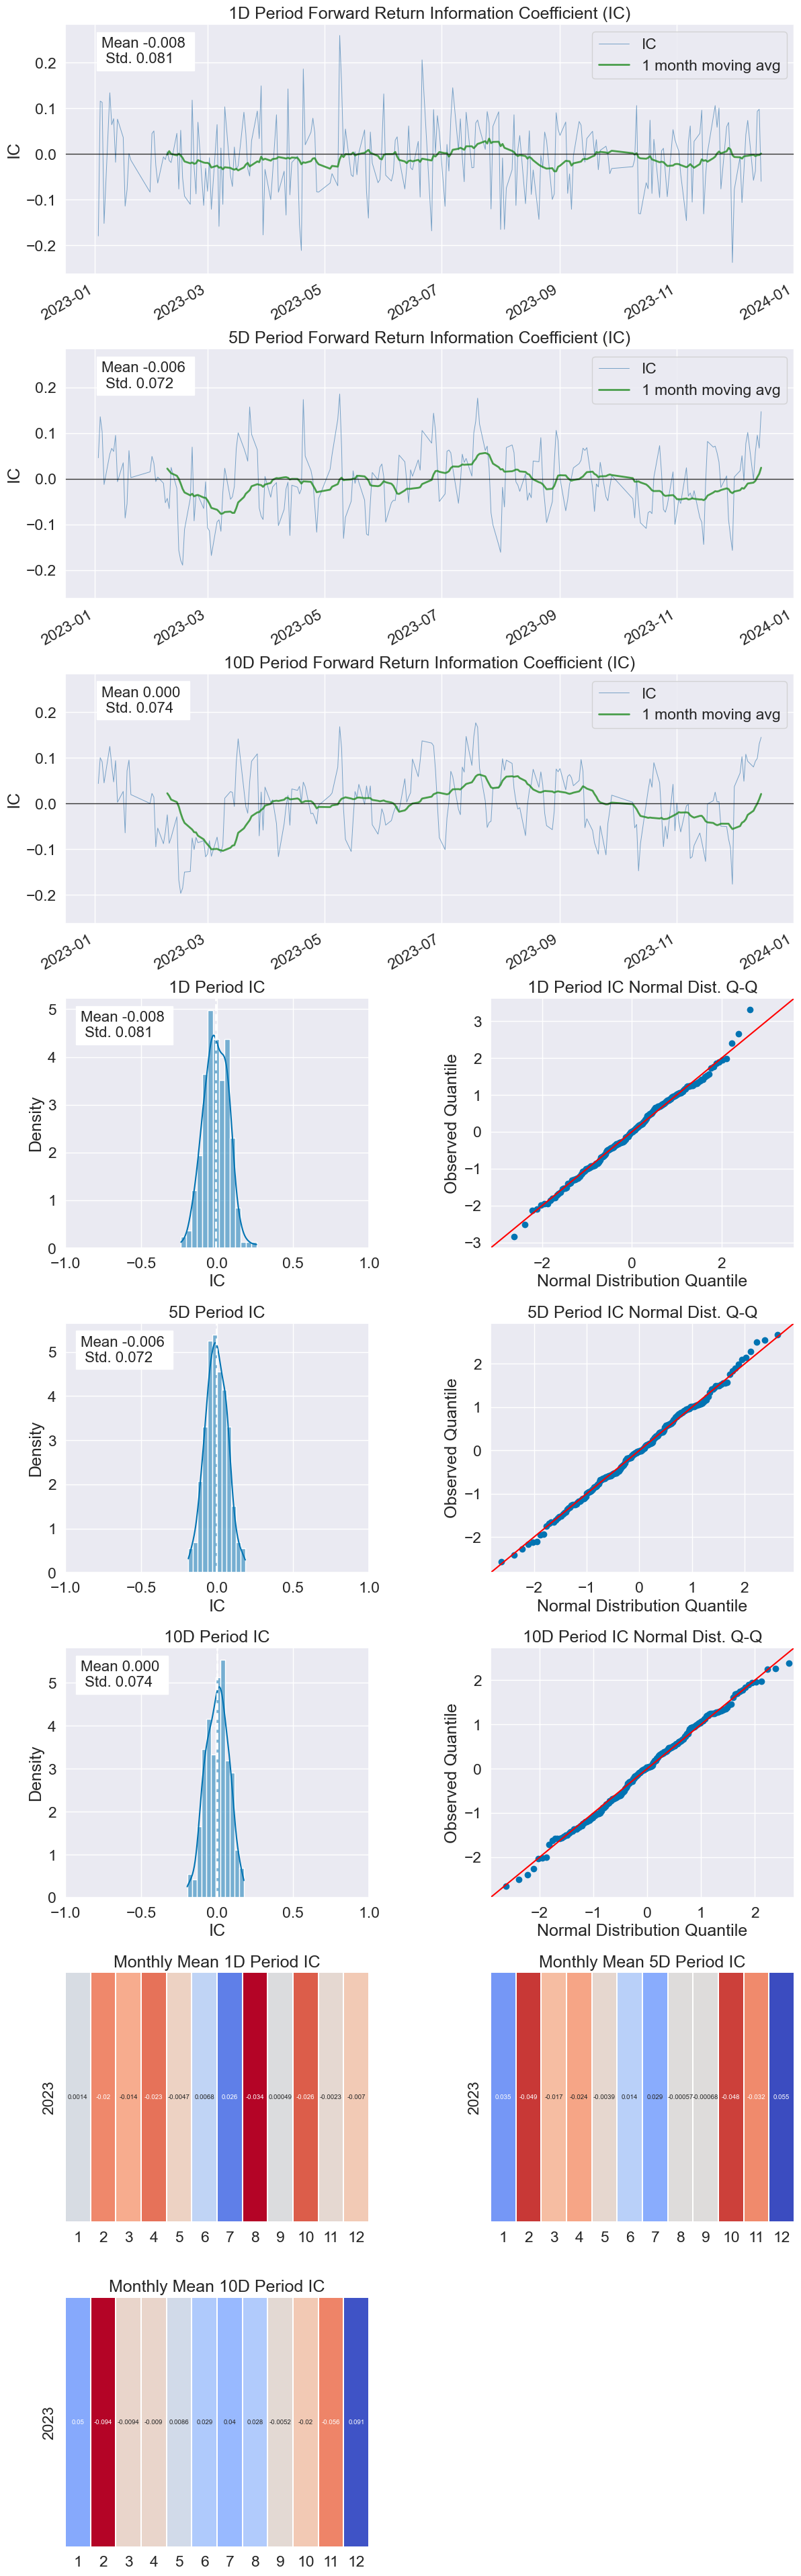

d:\project\alphas-main\alphalens\utils.py:918: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover   0.273  0.668  0.767
Quantile 2 Mean Turnover   0.506  0.775  0.795
Quantile 3 Mean Turnover   0.519  0.727  0.749
Quantile 4 Mean Turnover   0.519  0.776  0.800
Quantile 5 Mean Turnover   0.282  0.681  0.783

1D     5D    10D
Mean Factor Rank Autocorrelation  0.836  0.252  0.044

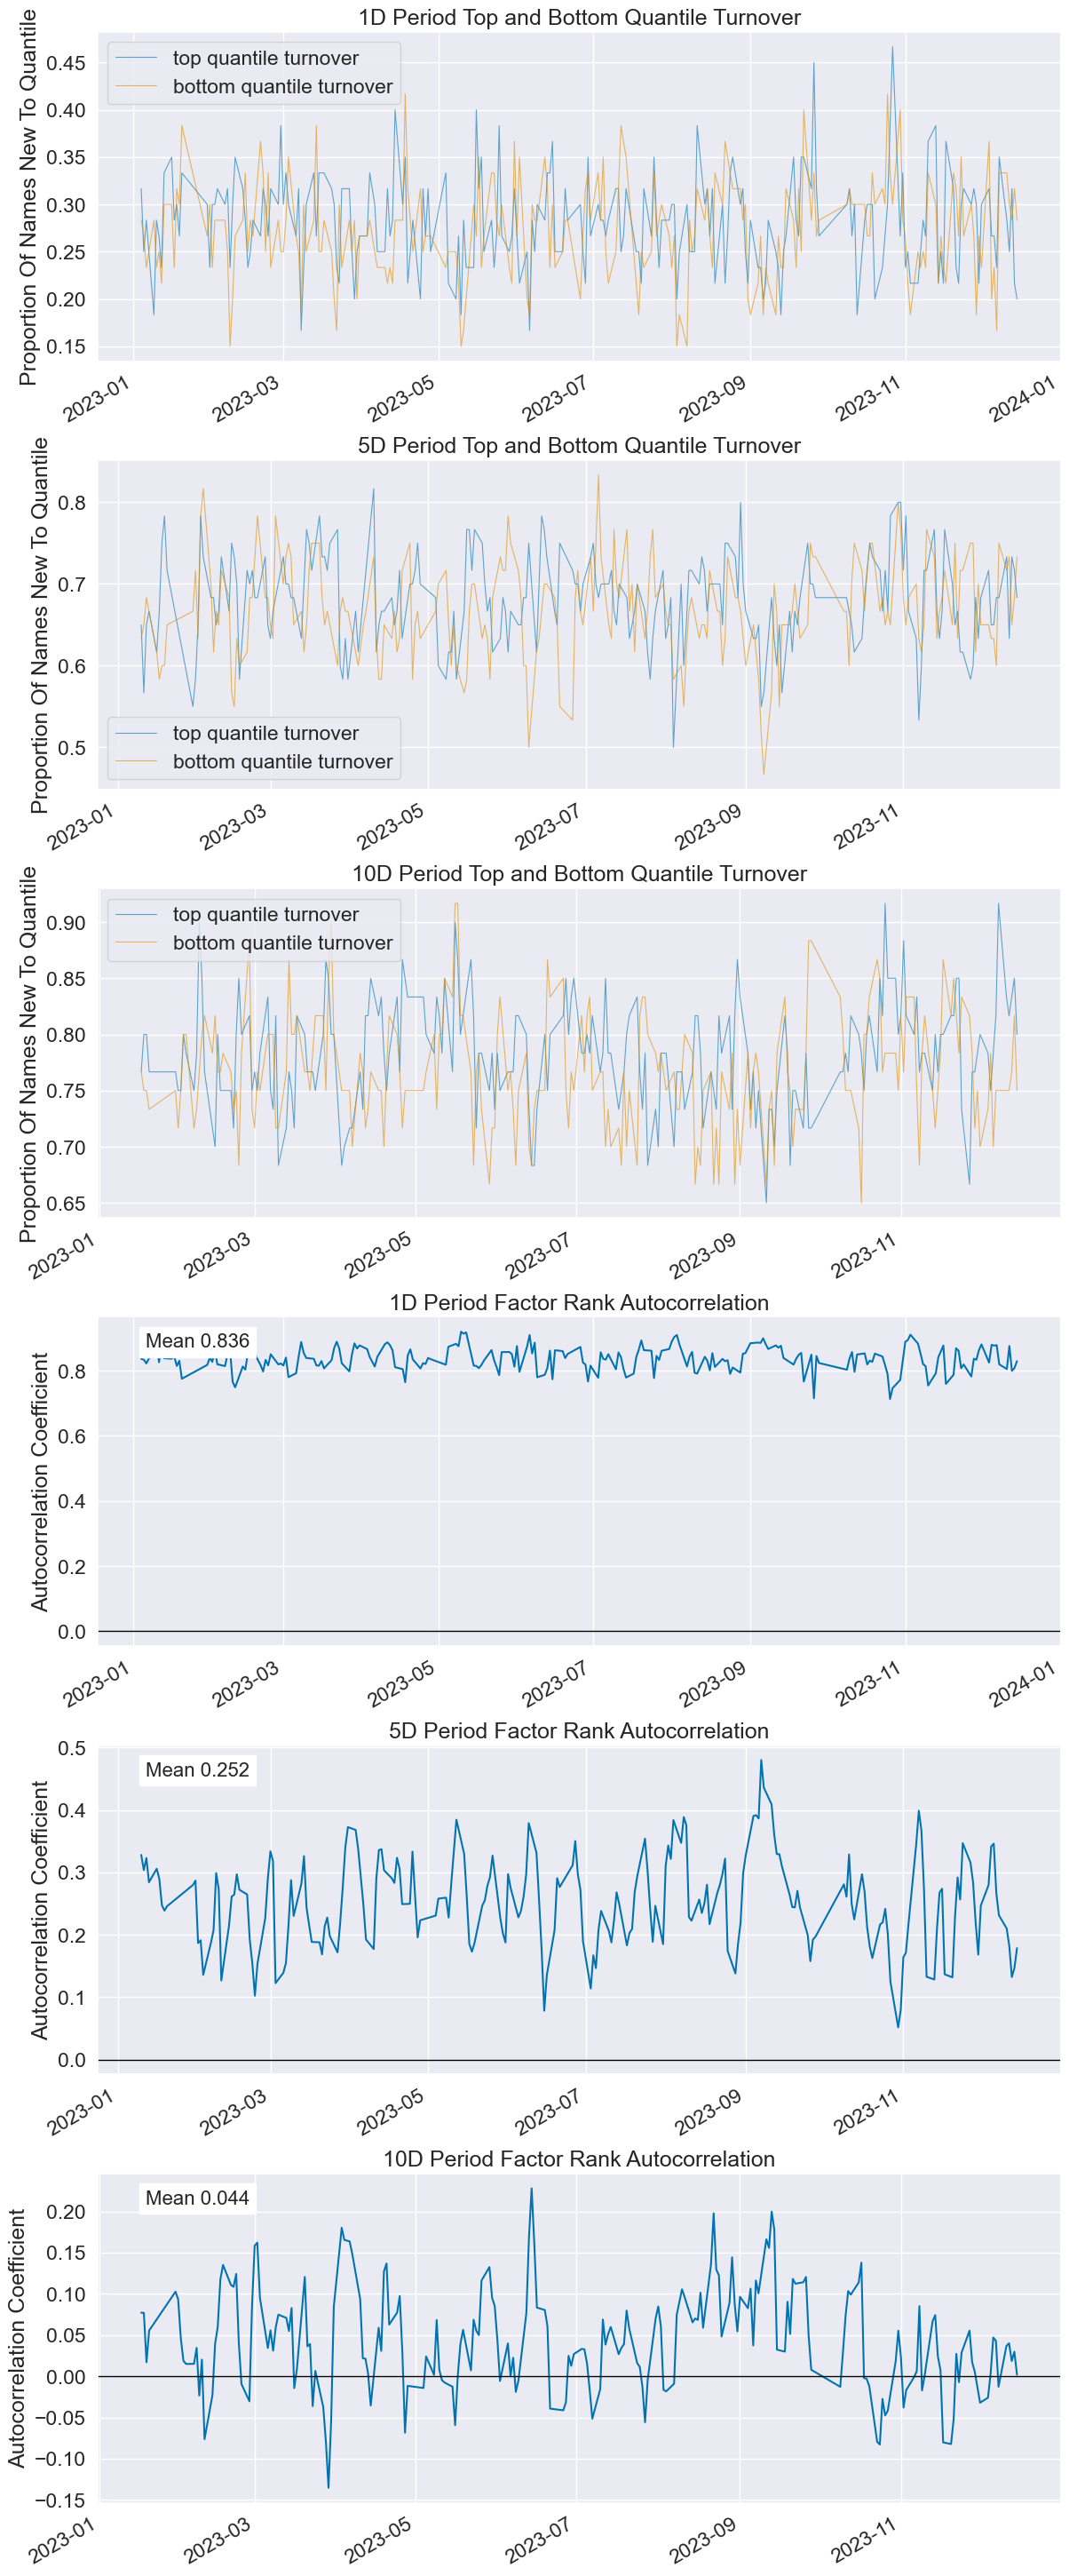

In [57]:
create_full_tear_sheet(ret, long_short=True)